-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring Fandango Displayed Scores versus True User Ratings

In [3]:
fandango = pd.read_csv("fandango_scrape.csv")

**Explore the DataFrame Properties and Head.**

In [4]:
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [5]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [6]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**The Relationship between popularity of a film and its rating.**

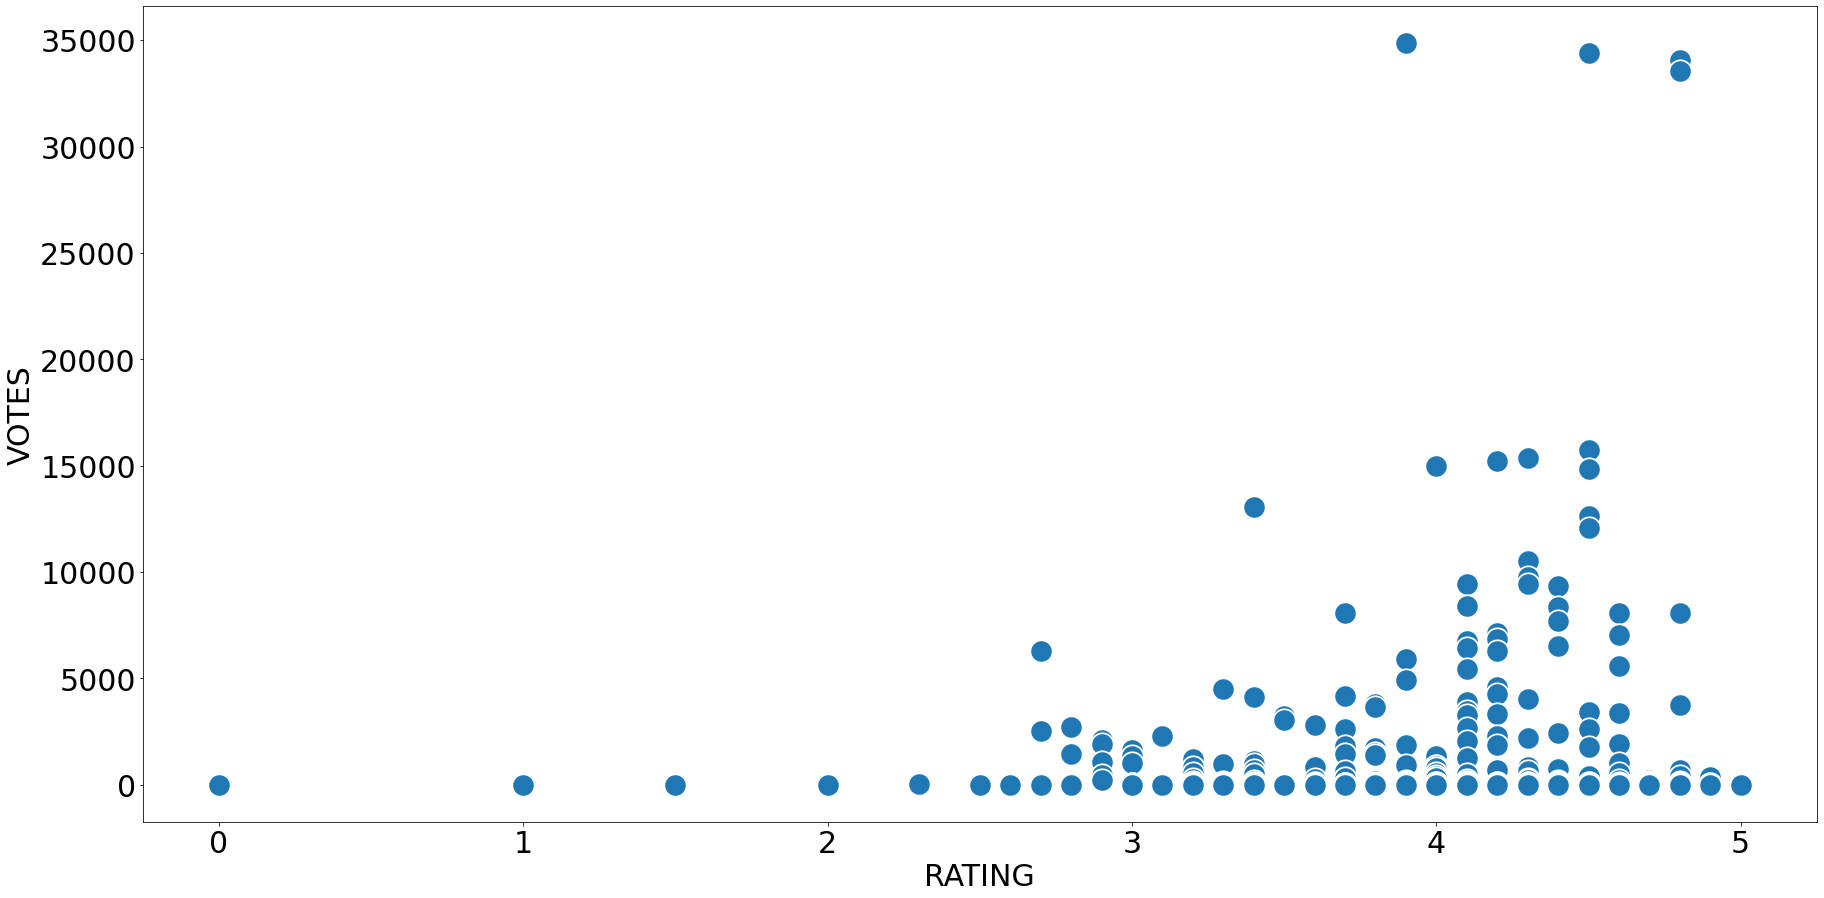

In [ ]:
font = {
        'size': 30,
        }


fig = plt.figure(figsize=(30,15))
sns.scatterplot(data=fandango,x='RATING',y='VOTES',s=500)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlabel("RATING",fontdict=font)
plt.ylabel("VOTES",fontdict=font)

plt.show()

**Checking the correlation between the columns of the data set:**

In [ ]:
fandango_corr = fandango.corr()
fandango_corr

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [ ]:
# extracting the year part from the film name and creating a new column

fandango['YEAR'] = fandango['FILM'].map(lambda p : p.split("(")[-1][:4])
fandango['YEAR'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: YEAR, dtype: object

**Answering how many movies are in the Fandango DataFrame per year?**

In [ ]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='count'>

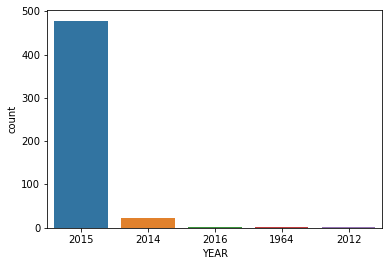

In [ ]:
sns.countplot(data=fandango,x='YEAR')

**Finding top 10 most voted movies**

In [ ]:
fandango.sort_values(by='VOTES',ascending=False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Answering how many movies got 0 votes**

In [ ]:
fandango.loc[fandango['VOTES']==0]['YEAR'].count()

69

In [ ]:
# extracted the movies which have been reviewed
fandango_reviewed = fandango.loc[fandango['VOTES']!=0]
fandango_reviewed.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


### Showing discrepancy in the true rating given and stars given by the website

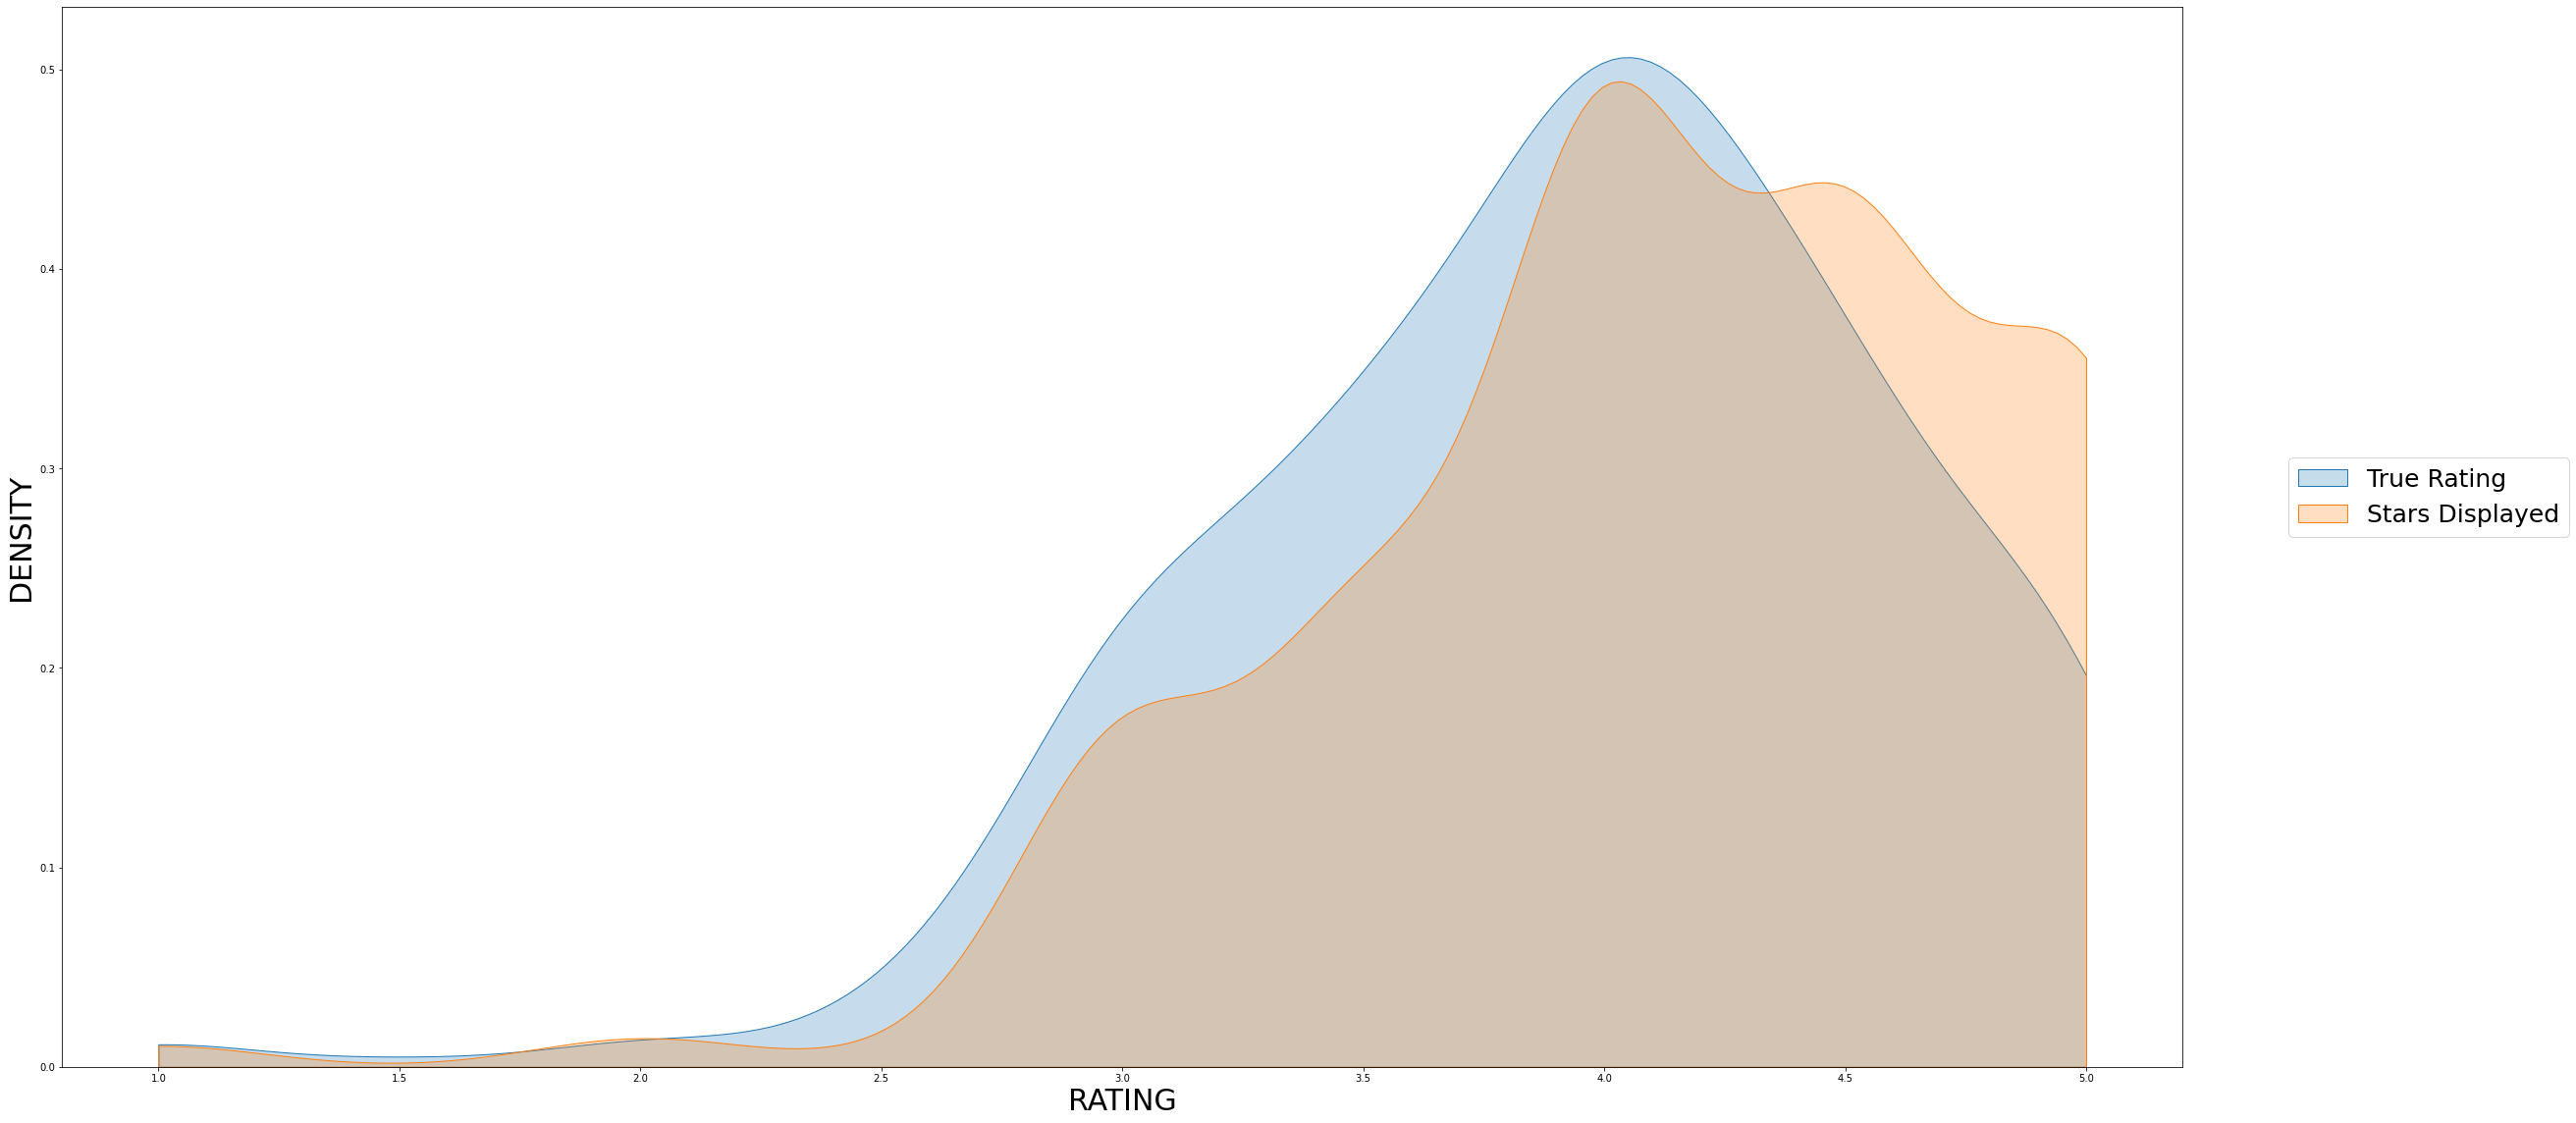

In [ ]:
fig = plt.figure(figsize=(30,15))
axes = fig.add_axes([0,0,1,1])
sns.kdeplot(data=fandango,x='RATING',clip=(1,5),fill=True,bw_adjust=0.5)
sns.kdeplot(data=fandango,x='STARS',clip=(1,5),fill=True,bw_adjust=0.5)

axes.set_xlabel("RATING",fontdict=font)
axes.set_ylabel("DENSITY",fontdict=font)

plt.legend(['True Rating','Stars Displayed'],loc=[1.05,0.5],fontsize = 25)
plt.show()

**Created a new column to quantify the discrepancy in ratings.**

In [ ]:
fandango['STARS_DIFF'] = round(fandango['STARS']-fandango['RATING'],1)
fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015,0.0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015,0.0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015,0.0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964,0.0


**Creating a count plot to display the number of times a certain difference occurs:**

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

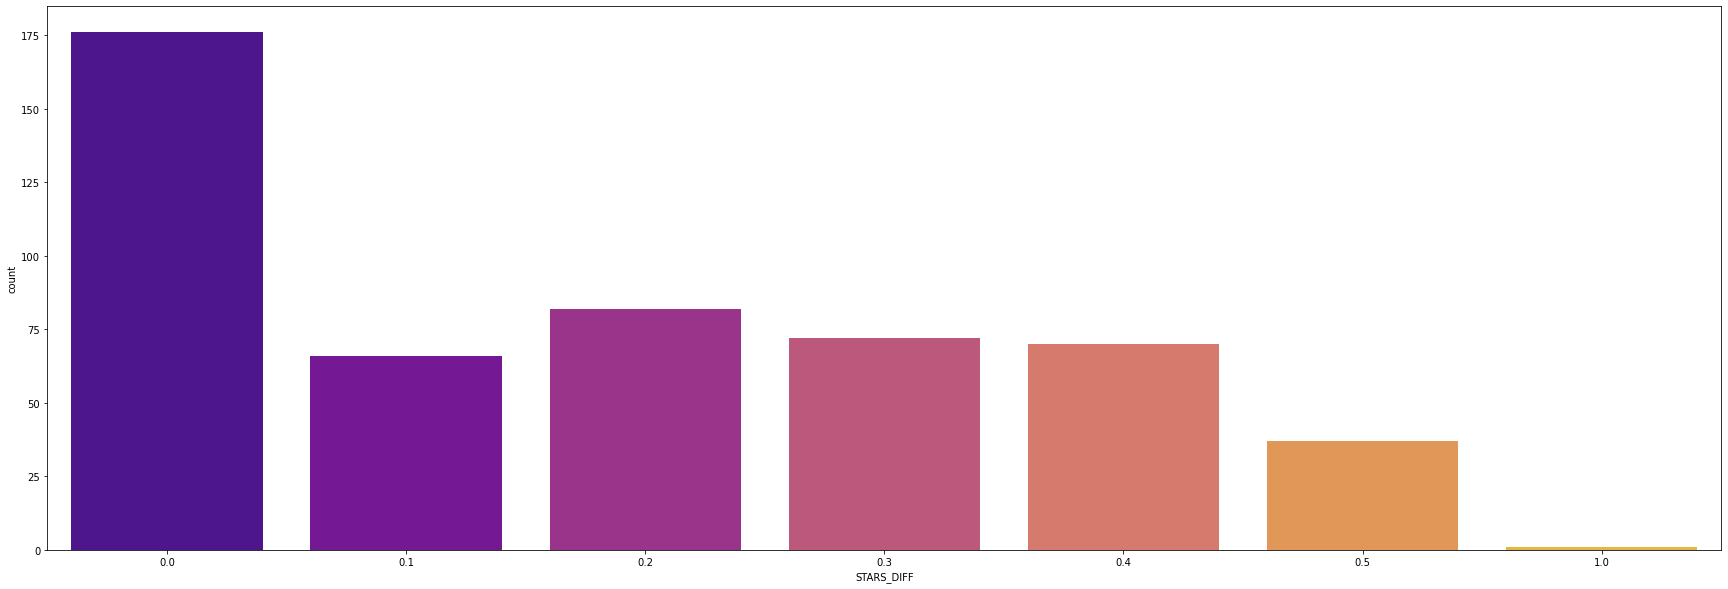

In [ ]:
fig = plt.figure(figsize=(30,10))
sns.countplot(data=fandango,x='STARS_DIFF',palette='plasma')

**Let's now compare the scores from Fandango to other movies sites and see how they compare.**

In [ ]:
# Reading the data from other sites
all_sites = pd.read_csv("all_sites_scores.csv")

**Exploring the DataFrame columns, info, description.**

In [ ]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [ ]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [ ]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes
**Creating a scatterplot to see the distribution between user reviews and critic reviews.**

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

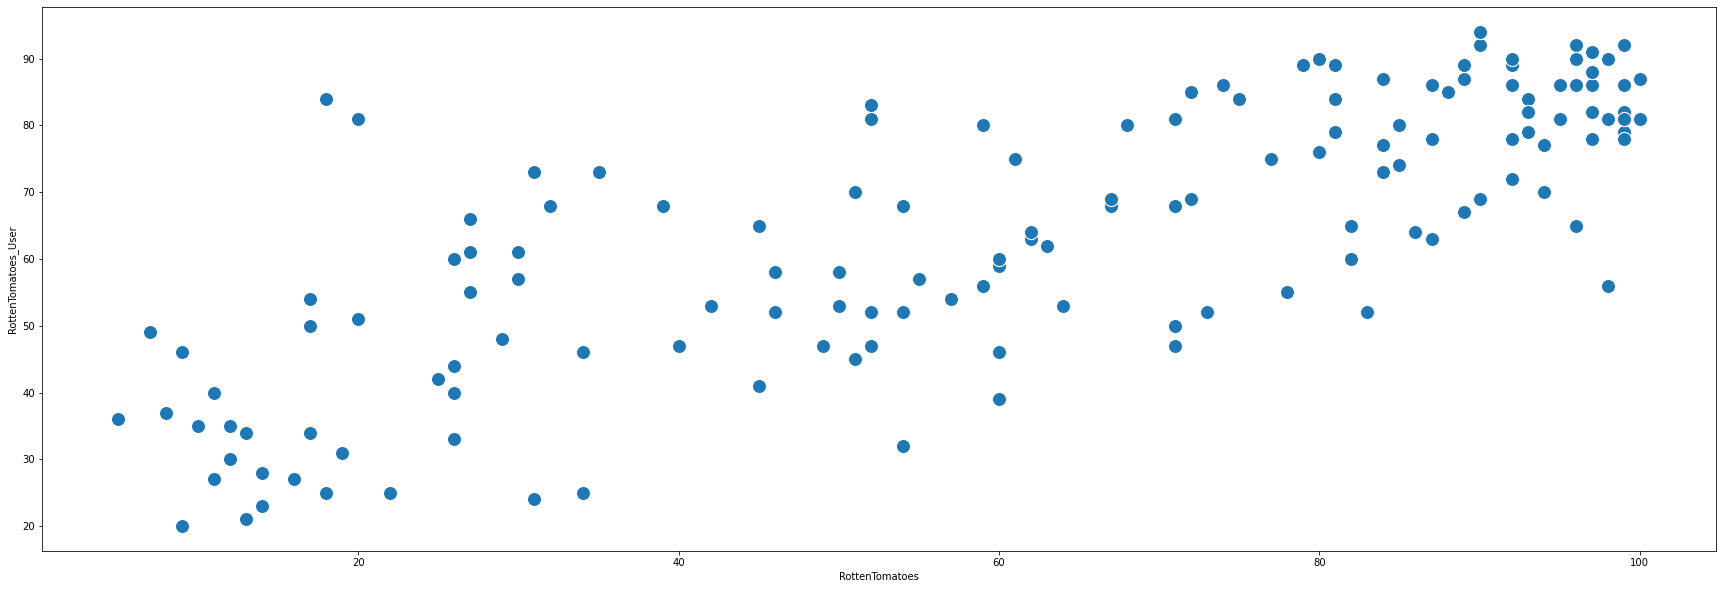

In [ ]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User',s=200)

**Creating a column to store the difference between user and critic reviews**

In [ ]:
all_sites['ROTTEN_DIFF'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']
all_sites['ROTTEN_DIFF']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: ROTTEN_DIFF, Length: 146, dtype: int64

**Checking what is the mean absolute difference of the calculated difference**

In [ ]:
all_sites['ROTTEN_DIFF'].abs().mean()

15.095890410958905

**Plot showing variation in rotten tomato difference**

<Figure size 2160x1080 with 0 Axes>

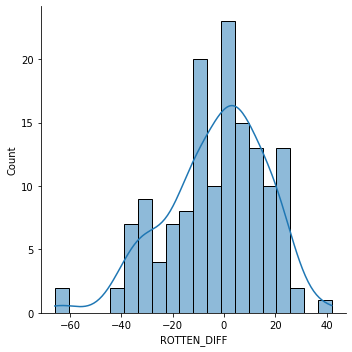

In [ ]:
fig = plt.figure(figsize=(30,15))
sns.displot(data=all_sites,x="ROTTEN_DIFF",kde = True, bins = 20)

plt.show()

**Plotting the mean absolute difference of Rotten tomatoes.**

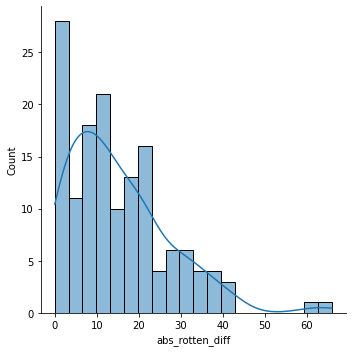

In [ ]:
all_sites['abs_rotten_diff'] = all_sites['ROTTEN_DIFF'].abs()
sns.displot(data=all_sites, x='abs_rotten_diff', kde=True, bins=20)

**top 5 movies users rated higher than critics on average:**

In [ ]:
all_sites[['FILM','ROTTEN_DIFF']].sort_values('ROTTEN_DIFF')[:5]

,FILM,ROTTEN_DIFF
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**The top 5 movies critics scores higher than users on average.**

In [ ]:
all_sites[['FILM','ROTTEN_DIFF']].sort_values('ROTTEN_DIFF',ascending=0)[:5]

,FILM,ROTTEN_DIFF
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24


## MetaCritic

**Analysis of the Metacritic Rating versus the Metacritic User rating using scatter plots.**

(0.0, 10.0)

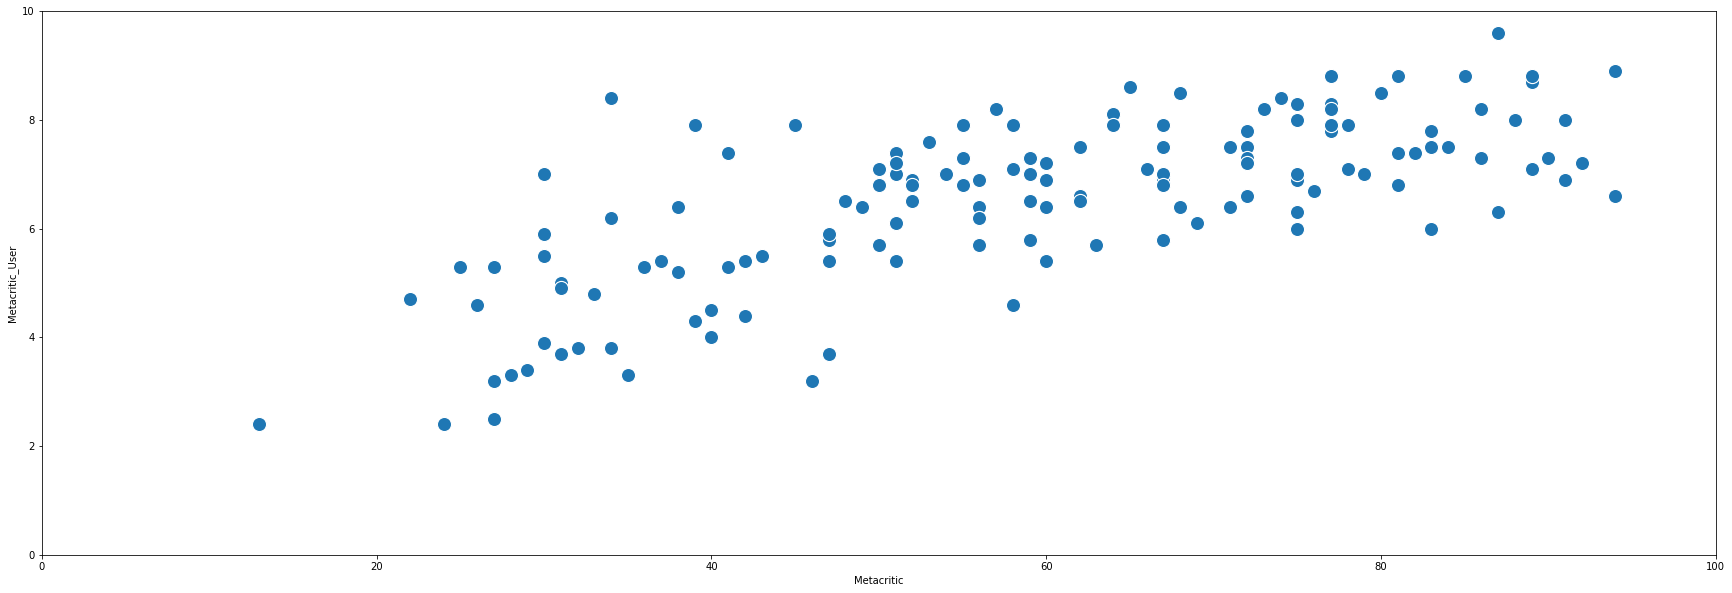

In [ ]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=all_sites,x="Metacritic",y="Metacritic_User",s=200)
plt.xlim((0,100))
plt.ylim((0,10))

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**TASK: Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

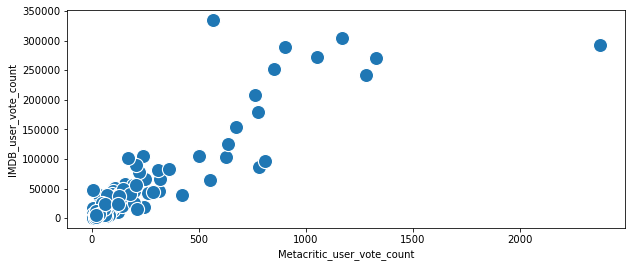

In [ ]:
plt.figure(figsize=(10,4))
sns.scatterplot(data=all_sites,x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count', s=20)


**What movie has highest IMDB vote count**

In [ ]:
all_sites.loc[all_sites['IMDB_user_vote_count'].argmax()]

FILM                          The Imitation Game (2014)
RottenTomatoes                                       90
RottenTomatoes_User                                  92
Metacritic                                           73
Metacritic_User                                     8.2
IMDB                                                8.1
Metacritic_user_vote_count                          566
IMDB_user_vote_count                             334164
ROTTEN_DIFF                                          -2
abs_rotten_diff                                       2
Name: 14, dtype: object

**What movie has the highest Metacritic User Vote count**

In [ ]:
all_sites.loc[all_sites['Metacritic_user_vote_count'].argmax()]

FILM                          Mad Max: Fury Road (2015)
RottenTomatoes                                       97
RottenTomatoes_User                                  88
Metacritic                                           89
Metacritic_User                                     8.7
IMDB                                                8.3
Metacritic_user_vote_count                         2375
IMDB_user_vote_count                             292023
ROTTEN_DIFF                                           9
abs_rotten_diff                                       9
Name: 88, dtype: object

### Comparing fandango ratings with all the other site ratings

**We will first combine both the tables**

In [ ]:
merged_all_sites = pd.merge(left=fandango,right=all_sites,how='inner',on='FILM')
merged_all_sites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   STARS_DIFF                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  ROTTEN_DIFF                 145 non

In [ ]:
merged_all_sites.head()

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,ROTTEN_DIFF,abs_rotten_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8,8


### Normalize columns to Fandango STARS and RATINGS 0-5 

As different websites have different metrics for representing rating, we will first normalise all those ratings according to fandango standards

In [ ]:
merged_all_sites['RT_Norm'] = round(merged_all_sites['RottenTomatoes']/20,1)

In [ ]:
merged_all_sites['RTU_Norm'] = round(merged_all_sites['RottenTomatoes_User']/20,1)

In [ ]:
merged_all_sites['Meta_Norm'] = round(merged_all_sites['Metacritic']/20,1)

In [ ]:
merged_all_sites['Meta_U_Norm'] = round(merged_all_sites['Metacritic_User']/2,1)

In [ ]:
merged_all_sites['IMDB_Norm'] = round(merged_all_sites['IMDB']/2,1)

**we store these normalised values in new dataframe**

In [ ]:
norm_scores = merged_all_sites[['STARS','RATING','RT_Norm','RTU_Norm','Meta_Norm','Meta_U_Norm','IMDB_Norm']]

In [ ]:
norm_scores.head()

Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm'],
      dtype='object')

### Comparing Distribution of Scores Across Sites

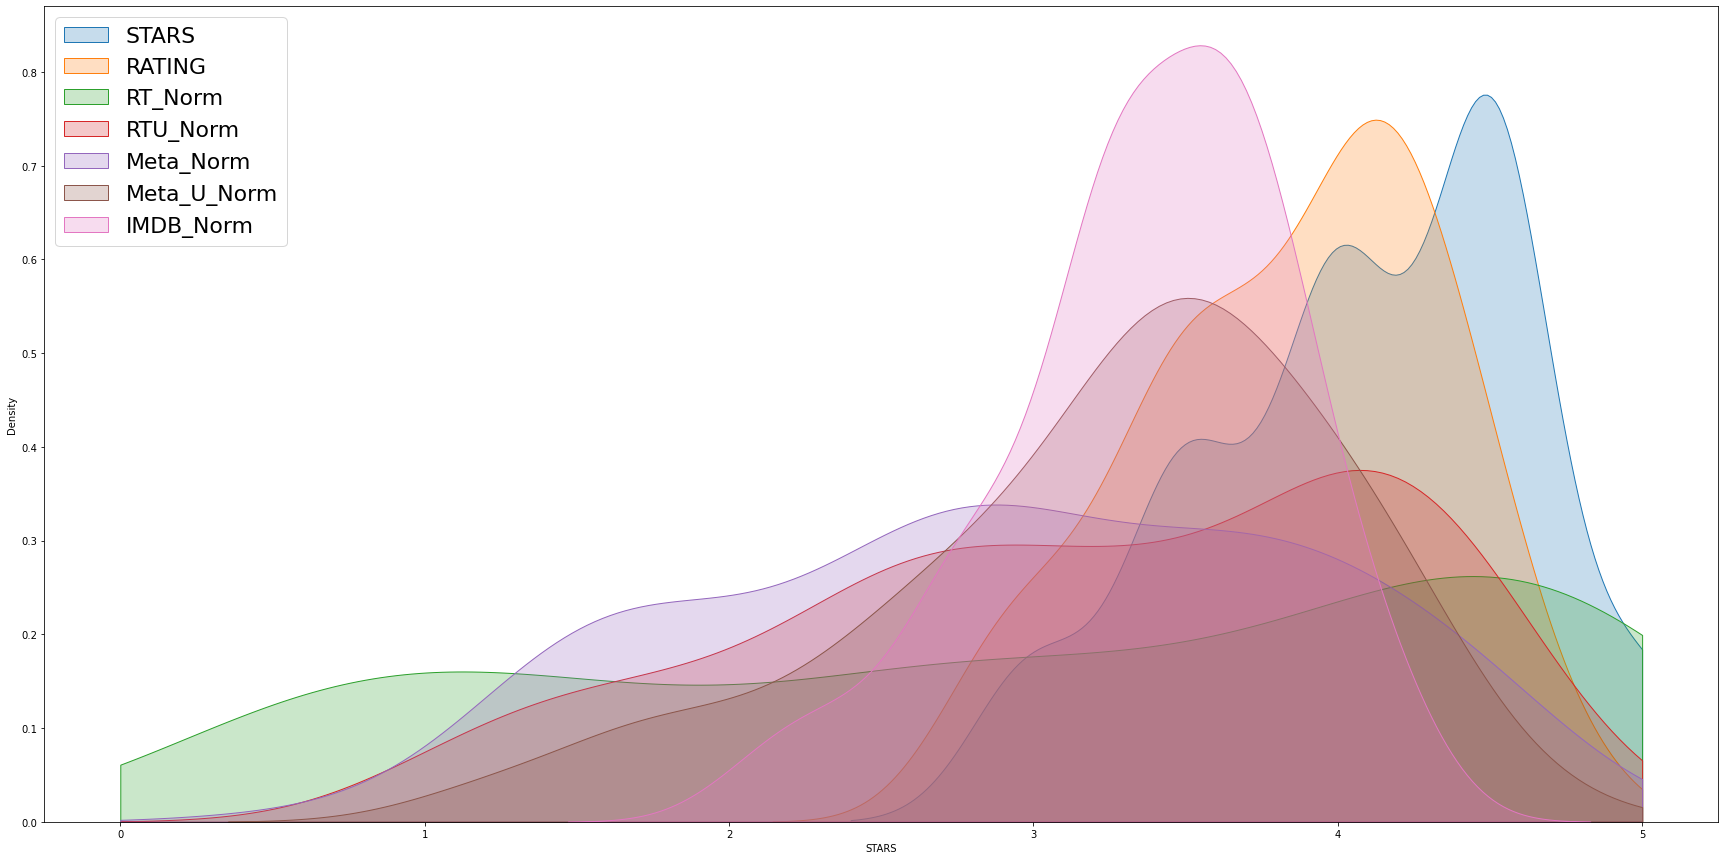

In [ ]:
plt.figure(figsize=(30,15))

sns.kdeplot(data=norm_scores,x='STARS',clip=(0,5),fill=True)
sns.kdeplot(data=norm_scores,x='RATING',clip=(0,5),fill = True)
sns.kdeplot(data=norm_scores,x='RT_Norm',clip=(0,5),fill = True)
sns.kdeplot(data=norm_scores,x='RTU_Norm',clip=(0,5),fill = True)
sns.kdeplot(data=norm_scores,x='Meta_Norm',clip=(0,5),fill = True)
sns.kdeplot(data=norm_scores,x='Meta_U_Norm',clip=(0,5),fill = True)
sns.kdeplot(data=norm_scores,x='IMDB_Norm',clip=(0,5), fill = True)

plt.legend(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm','IMDB_Norm'], loc = 'upper left', fontsize = 22)


**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 


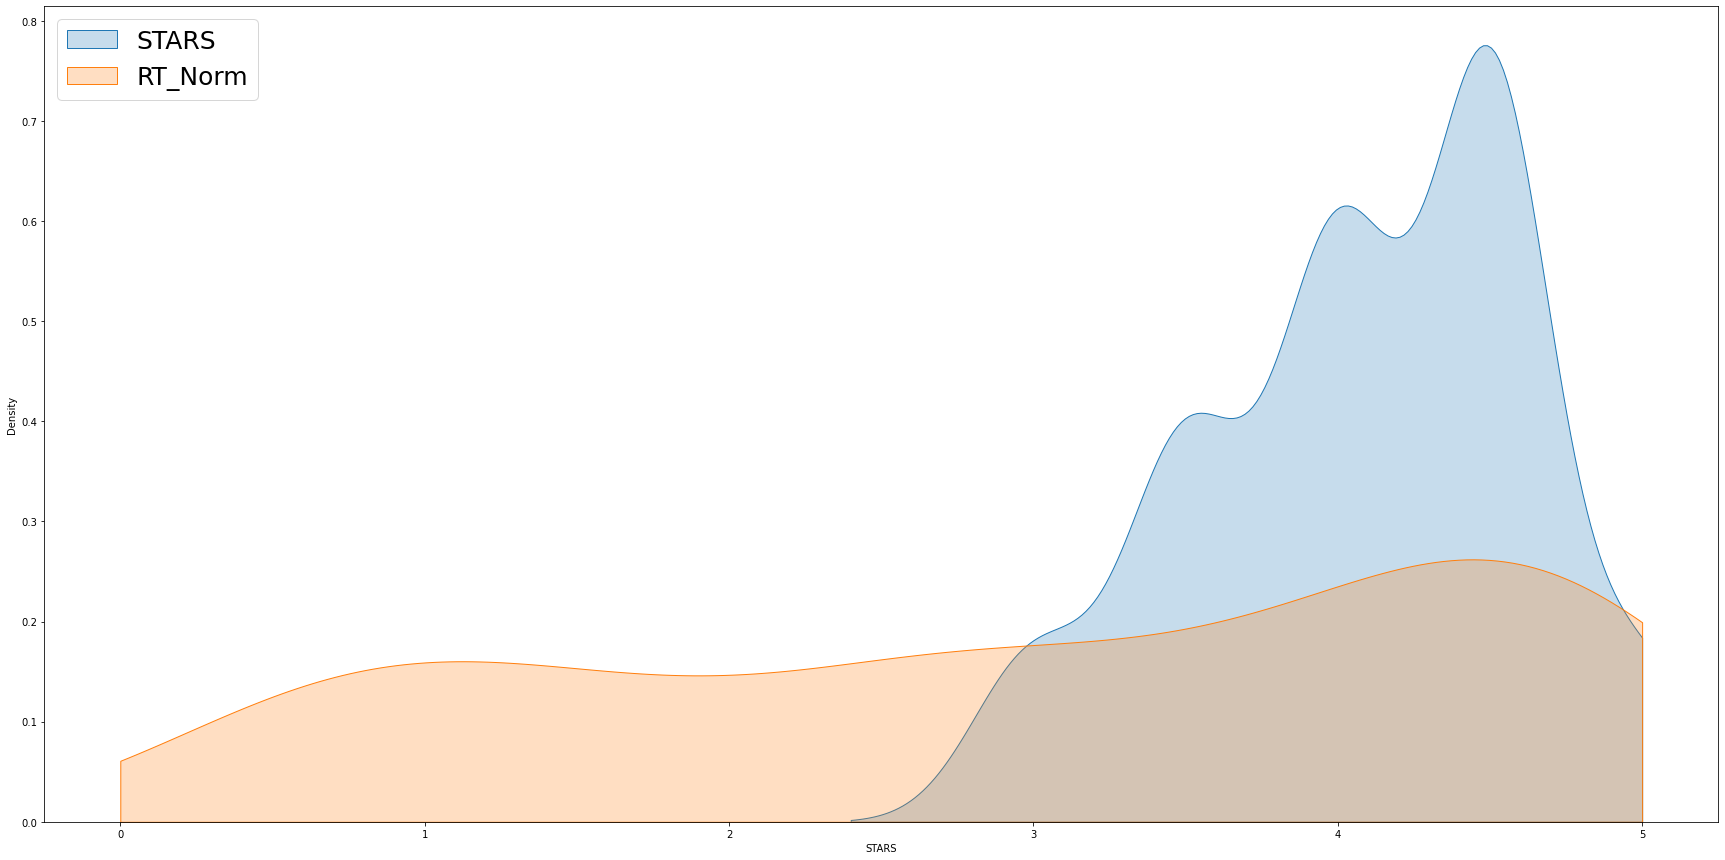

In [ ]:
plt.figure(figsize=(30,15))
sns.kdeplot(data=merged_all_sites,x='STARS', fill = True, clip=(0,5),legend=True)
sns.kdeplot(data=merged_all_sites,x='RT_Norm', fill = True, clip=(0,5),legend=True)

plt.legend(['STARS','RT_Norm'], loc = 'upper left', fontsize = 25)

**OPTIONAL TASK: Create a histplot comparing all normalized scores.**

<AxesSubplot:ylabel='Count'>

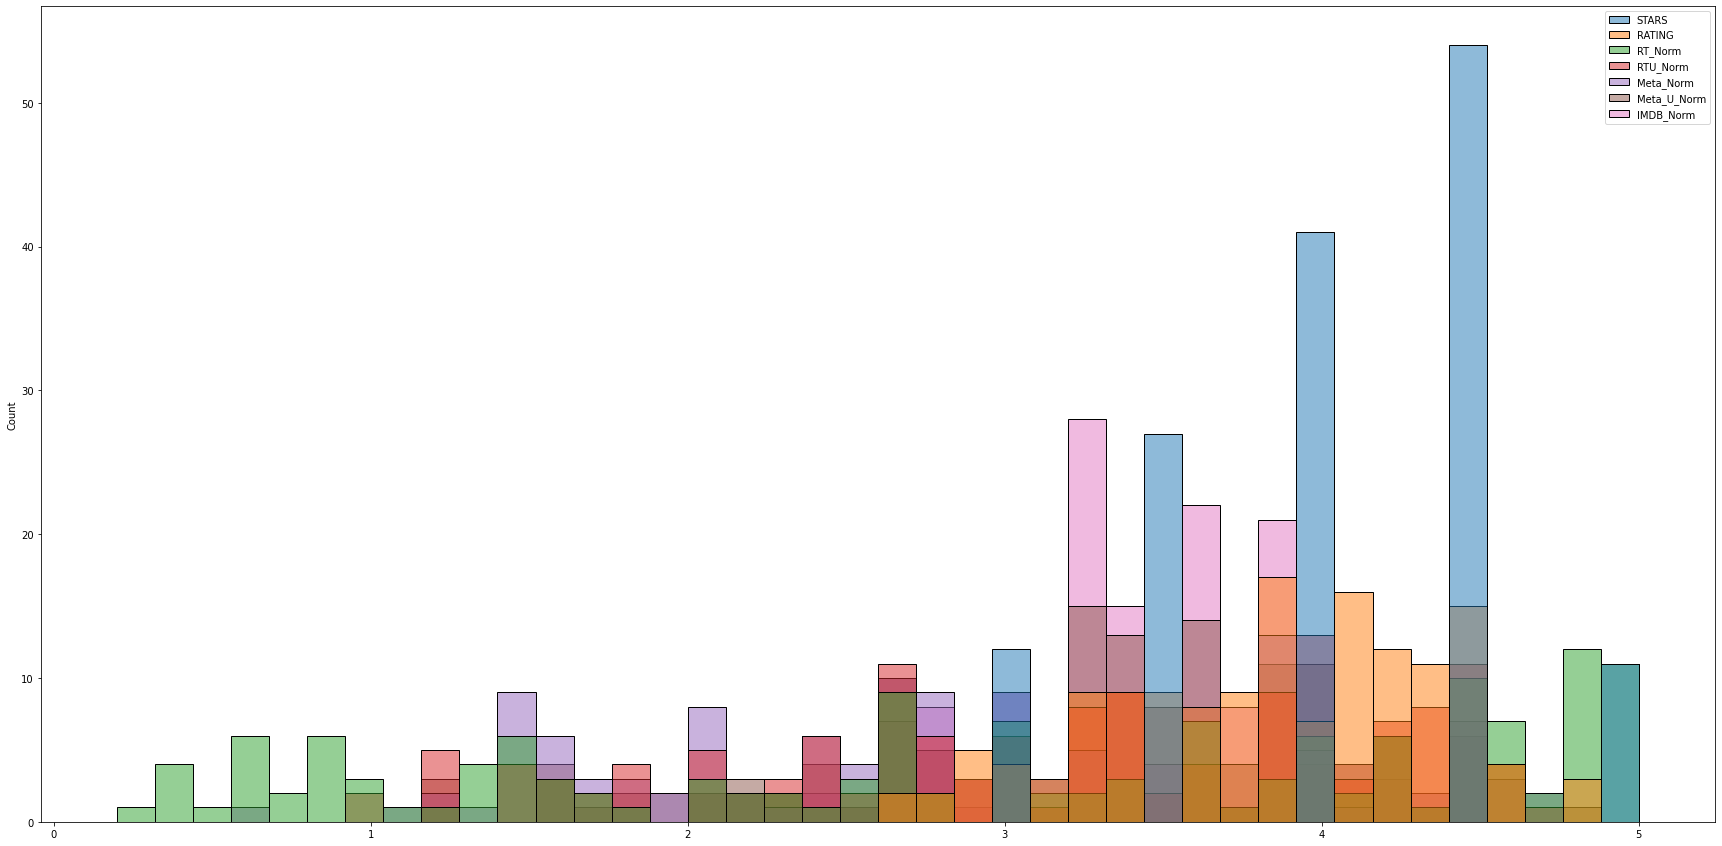

In [ ]:
#CODE HERE
plt.figure(figsize=(30,15))
sns.histplot(data=norm_scores,bins = 40)

<AxesSubplot:ylabel='Count'>

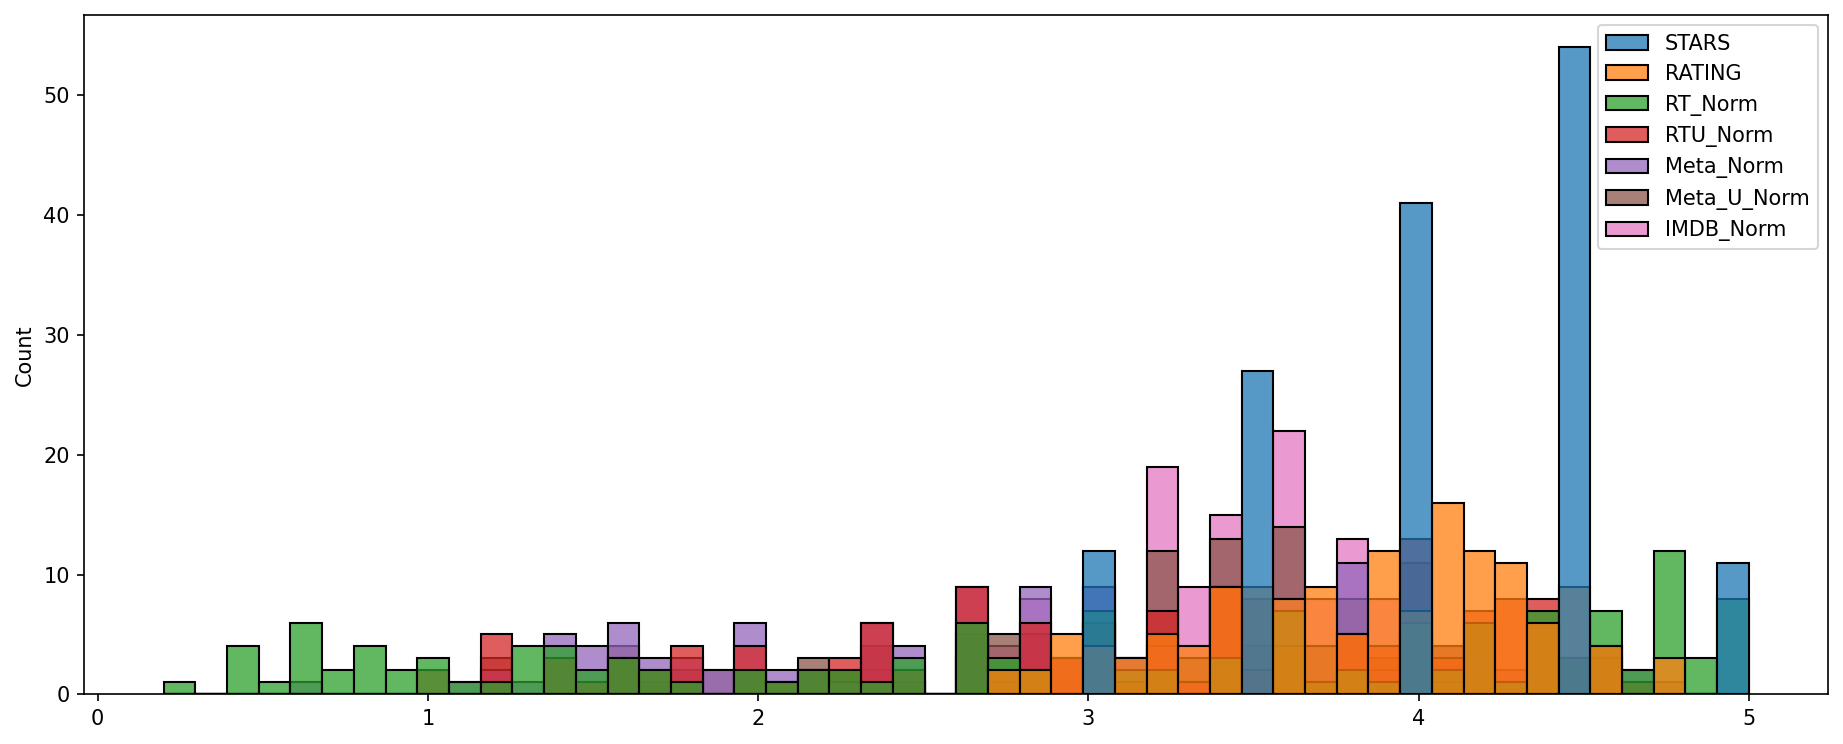


### How are the worst movies rated across all platforms?

**We create a clustermap to see how the ratings are actually varying for ratings clustered as similar.**

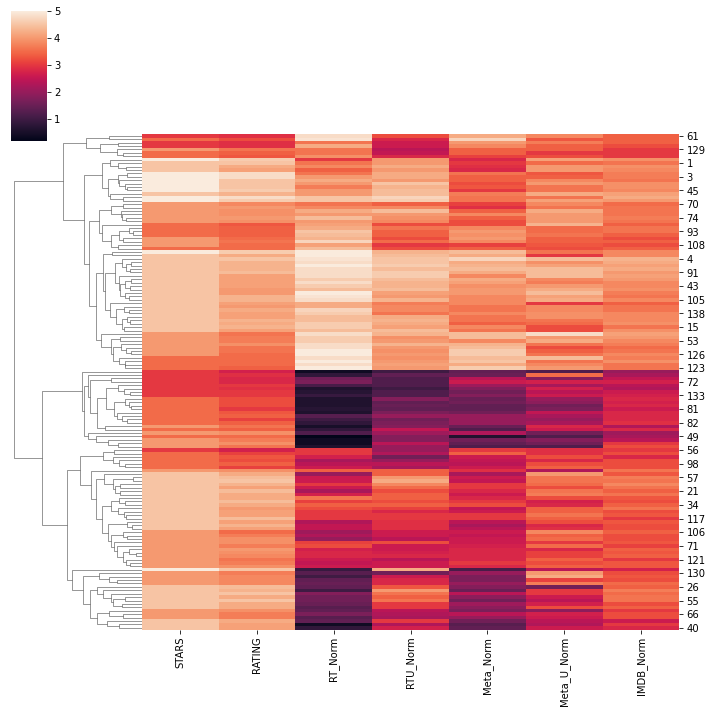

In [ ]:
# CODE HERE
sns.clustermap(data=norm_scores,col_cluster=False)

**As we can see from above, there is a sharp contrast in the colors of other websites and fandango, this clearly proves that fandango has been giving very high ratings to films in order to increase ticket sales**

In [ ]:
import copy as cp

norm_scores['FILM'] = cp.deepcopy(merged_all_sites['FILM'])
norm_scores.head()

/var/folders/d2/crq42fln7bl38wydcmzjs41c0000gn/T/ipykernel_8246/4275010306.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_scores['FILM'] = cp.deepcopy(merged_all_sites['FILM'])


,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)


In [ ]:
worst_10_movies = norm_scores.sort_values('RT_Norm')[:10]
worst_10_movies

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
109,3.0,2.9,0.6,1.0,1.8,2.7,2.3,The Vatican Tapes (2015)
88,4.0,3.6,0.6,2.0,1.2,1.2,3.2,The Loft (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)


**Visualising the distribution of ratings across all sites for the top 10 worst movies.**

<Axes:ylabel='Density'>

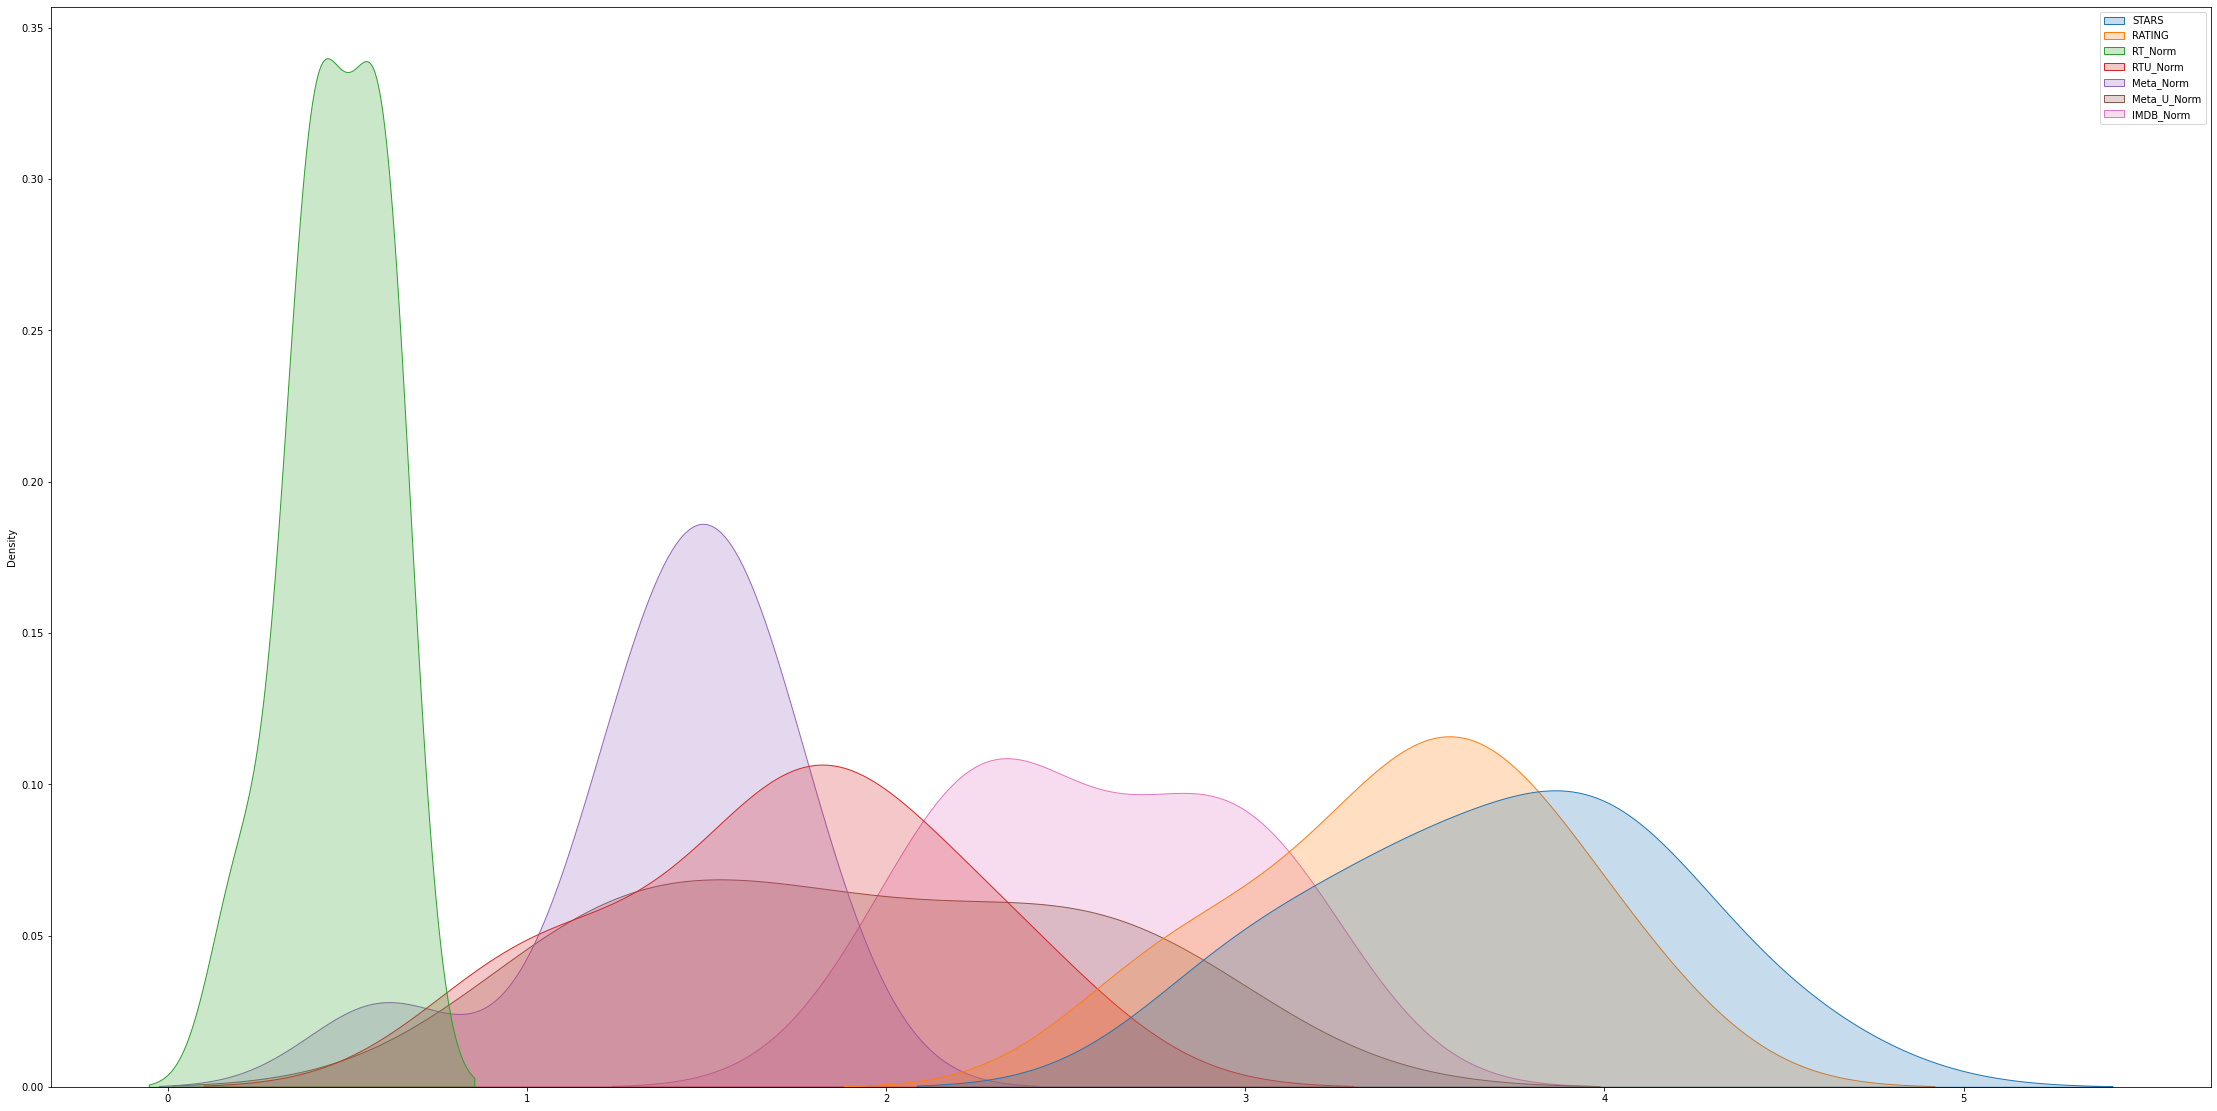

In [ ]:
fig = plt.figure(figsize=(30,15))
axes = fig.add_axes([0,0,1,1])
sns.kdeplot(data=worst_10_movies, fill = True)

----